In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data_python.csv')
P2 = 1 - data['P1']
data['P2'] = P2
data.head()

,Unnamed: 0,A1,A2,DP1,DP2,P1,R1,R2,TI,U1,U2,X1,X2,Y0,Y1,Y2,P2
0,0,0.5,0.5,0.0,0.0,0.5,0.3,0.0,0.7,0.01,0.01,0.5,0.5,0.0,0.5,0.5,0.5
1,1,0.5,0.5,0.0,0.0,0.5,0.3,0.0,0.7,0.01,0.01,0.5,0.5,0.0,0.5,0.5,0.5
2,2,0.5,0.5,0.0,0.0,0.5,0.3,0.0,0.7,0.01,0.01,0.5,0.5,0.0,0.5,0.5,0.5
3,3,0.5,0.5,0.0,0.0,0.5,0.3,0.0,0.7,0.01,0.01,0.5,0.5,0.0,0.5,0.5,0.5
4,4,0.5,0.5,0.0,0.0,0.5,0.3,0.0,0.7,0.01,0.01,0.5,0.5,0.0,0.5,0.5,0.5


In [4]:
train_x1 = data[['Y1', 'U1', 'R1']].values.reshape(233600, 3)
train_x2 = data[['P1']].values.reshape(233600, 1)
train_y = data['X1'].values.reshape(233600, 1)

In [4]:
index1 = [i * 146 for i in range(1600)]
index2 = [(i + 1) * 146 - 1 for i in range(1600)]
train_y1 = np.delete(train_y1, index1, axis=0)
train_y2 = np.delete(train_y2, index2, axis=0)
train_y = np.hstack((train_y1, train_y2))
train_x = np.array(train_x).reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
stdsc = StandardScaler()
train_x = stdsc.fit_transform(train_x)
joblib.dump(stdsc, "stdsc_python_mlp_x_to_many.m")
train_x = np.delete(train_x, index2, axis=0)
# train_x = np.array(train_x).reshape(-1,)
# train_x_new = []
# for i in range(1600):
#     tmp = np.array([0] * 9)
#     x_tmp = np.hstack((tmp, train_x[i * 146: (i + 1)* 146]))
#     for j in range(len(x_tmp) - 10):
#         train_x_new.append(x_tmp[j: j + 10])
# train_x = np.array(train_x_new).reshape(145 *1600, 10)
print(train_x.shape, train_y.shape)

(232000, 1) (232000, 4)


In [5]:
X_train = train_x[:186880, :]
X_test = train_x[186880:, :]
Y_train = train_y[:186880, :]
Y_test = train_y[186880:, :]

In [6]:
model = Sequential()
model.add(Dense(32, input_shape=(1, )))
model.add(Activation('tanh'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(4))
model.compile(optimizer='adam', loss='mse')

In [11]:
history = model.fit(X_train, Y_train, batch_size=146, epochs=10,
                    validation_data=(X_test, Y_test))

Train on 186880 samples, validate on 45120 samples
Epoch 1/10
186880/186880 [==============================] - 2s 8us/step - loss: 1.0995e-04 - val_loss: 1.0531e-04
Epoch 2/10
186880/186880 [==============================] - 1s 8us/step - loss: 1.0809e-04 - val_loss: 1.1006e-04
Epoch 3/10
186880/186880 [==============================] - 1s 7us/step - loss: 1.0834e-04 - val_loss: 1.0665e-04
Epoch 4/10
186880/186880 [==============================] - 1s 8us/step - loss: 1.0790e-04 - val_loss: 1.0503e-04
Epoch 5/10
186880/186880 [==============================] - 1s 8us/step - loss: 1.0842e-04 - val_loss: 1.2117e-04
Epoch 6/10
186880/186880 [==============================] - 2s 9us/step - loss: 1.0825e-04 - val_loss: 1.0662e-04
Epoch 7/10
186880/186880 [==============================] - 2s 8us/step - loss: 1.0643e-04 - val_loss: 1.0523e-04
Epoch 8/10
186880/186880 [==============================] - 1s 8us/step - loss: 1.0819e-04 - val_loss: 1.0775e-04
Epoch 9/10
186880/186880 [===========

In [12]:
pred = model.predict(X_test)

c:\python35\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


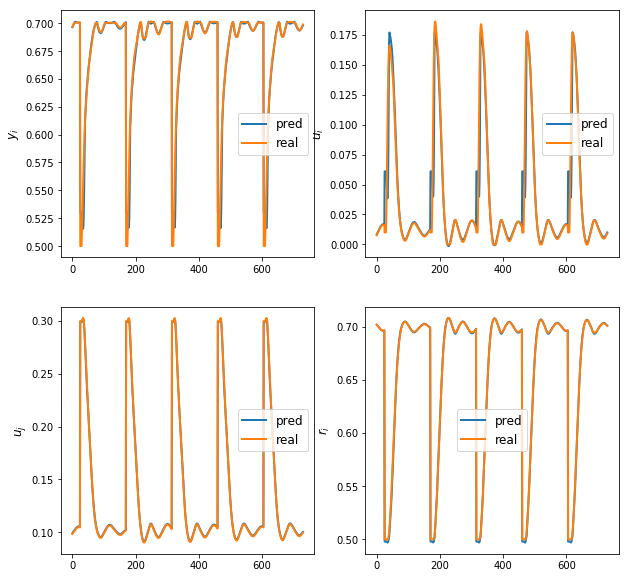

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,10), ncols=2, nrows=2)

ax[0][0].plot(pred[:730, 0], linewidth=2, label='pred')
ax[0][0].plot(Y_test[:730, 0], linewidth=2, label='real')
ax[0][0].set_ylabel('$y_{i}$', fontsize=12)
ax[0][0].legend(fontsize=12, loc='best')

ax[0][1].plot(pred[:730, 1], linewidth=2, label='pred')
ax[0][1].plot(Y_test[:730, 1], linewidth=2, label='real')
ax[0][1].set_ylabel('$u_{i}$', fontsize=12)
ax[0][1].legend(fontsize=12, loc='best')

ax[1][0].plot(pred[:730, 2], linewidth=2, label='pred')
ax[1][0].plot(Y_test[:730, 2], linewidth=2, label='real')
ax[1][0].set_ylabel('$u_{j}$', fontsize=12)
ax[1][0].legend(fontsize=12, loc='best')

ax[1][1].plot(pred[:730, 3], linewidth=2, label='pred')
ax[1][1].plot(Y_test[:730, 3], linewidth=2, label='real')
ax[1][1].set_ylabel('$r_{i}$', fontsize=12)
ax[1][1].legend(fontsize=12, loc='best')

# ax[2][0].plot(pred[:730, 4], linewidth=2, label='pred')
# ax[2][0].plot(Y_test[:730, 4], linewidth=2, label='real')
# ax[2][0].set_xlabel('time(s)', fontsize=12)
# ax[2][0].set_ylabel('$r_{j}$', fontsize=12)
# ax[2][0].legend(fontsize=12, loc='best')

# ax[2][1].plot(pred[:730, 5], linewidth=2, label='pred')
# ax[2][1].plot(Y_test[:730, 5], linewidth=2, label='real')
# ax[2][1].set_ylabel('$p_{i}$', fontsize=12)
# ax[2][1].legend(fontsize=12, loc='best')

# ax[3][0].plot(pred[:730, 6], linewidth=2, label='pred')
# ax[3][0].plot(Y_test[:730, 6], linewidth=2, label='real')
# ax[3][0].set_ylabel('$dp_{i}$', fontsize=12)
# ax[3][0].legend(fontsize=12, loc='best')

f.show()
plt.show()

In [14]:
pred = model.predict(train_x)
V = np.dot((pred - train_y).T, (pred - train_y)) / train_y.shape[0]
print(V)

[[  1.14307612e-04   1.81903178e-04   4.29687389e-07   5.15038140e-07]
 [  1.81903178e-04   2.97315985e-04   7.73214456e-07  -2.12835815e-06]
 [  4.29687389e-07   7.73214456e-07   4.90983768e-07   2.84939941e-07]
 [  5.15038140e-07  -2.12835815e-06   2.84939941e-07   2.64277772e-06]]


In [15]:
model.save('mlp_x1_to_4.h5')